# Chapter 3 - Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

## MNIST

In [2]:
#import dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# features and target vectores - Both are dataframes

x, y = mnist['data'], mnist['target']

In [4]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#feature vector shape

x.shape

(70000, 784)

In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
#target vector shape

y.shape

(70000,)

In [8]:
#import packages to draw

import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [9]:
some_digit = x.iloc[0].to_numpy() #select row and transform to numpy
some_digit_image = some_digit.reshape(28,28) #reshape
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

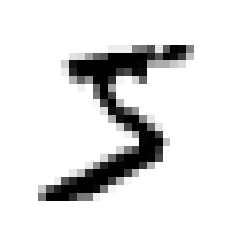

In [10]:
#plot the image

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [11]:
#target for that image

y[0]

'5'

In [12]:
#target is a string. Cast to a number

y = y.astype(np.uint8)
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

In [13]:
#train / test split manually. The datasets are already shuffled

x_train,x_test, y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 784)
Shape of y_train: (60000,)
Shape of x_test: (10000, 784)
Shape of y_test: (10000,)


## Training a Binary Classifier

In [14]:
#Try to identify only one digit

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(f'Shape of y_train_5 is: {y_train_5.shape}')
print(f'Shape of y_test_5 is: {y_test_5.shape}')

Shape of y_train_5 is: (60000,)
Shape of y_test_5 is: (10000,)


In [15]:
#import the classifier - SGDClassifier
from sklearn.linear_model import SGDClassifier

#instantiate the classifier
sdg_clf = SGDClassifier(random_state=42)

#fit the model with the training data
sdg_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [16]:
#predict about an instance that we know is a 5

sdg_clf.predict([some_digit])

array([ True])

## Performance Measure

### Implementing Cross-Validation

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#instantiate the fold generator
skfolds = StratifiedKFold(n_splits=3)

#obtain the indices of the fold,generate datasets,train and show the metric
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sdg_clf)
    x_train_fold = x_train.iloc[train_index]
    y_train_fold = y_train_5.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct/len(y_test_fold)
    print(f'Accuracy is: {accuracy}')

Accuracy is: 0.95035
Accuracy is: 0.96035
Accuracy is: 0.9604


In [18]:
#here we use the Class cross_vale_score from sklearn to realice cross-validation in model

from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
#dumb classifier - definition

from sklearn.base import BaseEstimator

class Nevere5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [20]:
#apply the dumb classifier

never_5_clf = Nevere5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [21]:
#use cross_vale_predict to obtain the predicted class in every test fold

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sdg_clf,x_train,y_train_5,cv=3)

In [22]:
#using the predict classes and the true classes we can obtain the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

* 53862: Original class non-5s images and predicted by the model as non-5s images - True Negative (TN)
* 3530: Original class 5s images and predicted by the model as 5s images - True Positive (TP)
* 687: Original class non-5s and predicted by the model as 5s images - False Positive (FP)
* 1891: Original class 5s images and predicted by the model as non-5s images - False Negative (FN)

In [23]:
#show a confusion matrix with only True Positive and True Negative

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [29]:
#calculate precision and recall

from sklearn.metrics import precision_score, recall_score

print(f'Precision Score:{round(precision_score(y_train_5, y_train_pred),3)}')
print(f'Recall Score:{round(recall_score(y_train_5, y_train_pred),3)}')

Precision Score:0.837
Recall Score:0.651


In [33]:
#compute the F1 Score

from sklearn.metrics import f1_score

print(f'F1 Scrore: {round(f1_score(y_train_5,y_train_pred),3)}')

F1 Scrore: 0.733
